In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#extraction des infos honorraires
df_honoraire_raw = pd.read_excel('inse440_13.xls',sheetname='Spécialistes',header=0,index_col=1, na_values='nc')

In [3]:
#Transformation des index pour avoir des index similaires
df_honoraire_raw.index = df_honoraire_raw.index.str.lower()
print(df_honoraire_raw.shape)

(2030, 6)


In [4]:
#Ajout colonne ration depassement moyen
df_honoraire_raw["DEPASSEMENT_MOYEN_ANNUEL"] =  (df_honoraire_raw["DEPASSEMENTS (Euros)"] / df_honoraire_raw["EFFECTIFS"])
df_honoraire_raw[:5]

,SPECIALITE,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros),DEPASSEMENT_MOYEN_ANNUEL
REGION INSEE,,,,,,,
11- ile-de-france,01- Médecine générale,7895,1.031850e+09,91412161.0,556765.0,1.123818e+09,11578.487777
21- champagne-ardenne,01- Médecine générale,1074,1.694309e+08,825381.0,889551.0,1.711458e+08,768.511173
22- picardie,01- Médecine générale,1381,2.302287e+08,1769334.0,1054369.0,2.330524e+08,1281.197683
23- haute-normandie,01- Médecine générale,1414,2.152195e+08,1440122.0,501870.0,2.171615e+08,1018.473833
24- centre,01- Médecine générale,1855,2.735875e+08,3467456.0,1491899.0,2.785469e+08,1869.248518


In [5]:
#Pour chaque que spe avoir le top 3 des regions sur le depassement puis comparer à la densité
df_honoraire = df_honoraire_raw.drop(["HONORAIRES SANS DEPASSEMENT (Euros)","DEPASSEMENTS (Euros)","FRAIS DE DEPLACEMENT (Euros)","TOTAL DES HONORAIRES (Euros)"],axis=1)

In [6]:
#retire toutes les colonnes total
df_honoraire = df_honoraire[~df_honoraire.index.str.contains("total")]
df_honoraire = df_honoraire[~df_honoraire["SPECIALITE"].str.contains("TOTAL")]
df_honoraire["NUM_REGION"]= df_honoraire.index.str.split('-',1).str.get(0)
df_honoraire["NOM_REGION"]= df_honoraire.index.str[4:]
df_honoraire["NOM_SPE"] = df_honoraire["SPECIALITE"].str.split('-').str.get(1)
df_honoraire["NUM_SPE"] = df_honoraire["SPECIALITE"].str.split('-').str.get(0)
df_honoraire["key"] = df_honoraire["SPECIALITE"].str.cat(df_honoraire["NUM_REGION"].values.tolist(),sep="-")

In [7]:
df_honoraire.set_index('key',inplace=True)
df_honoraire.drop(["SPECIALITE"],axis=1)
new_order=["NUM_REGION","NOM_REGION","NUM_SPE","NOM_SPE","EFFECTIFS","DEPASSEMENT_MOYEN_ANNUEL"]
df_honoraire = df_honoraire.reindex(columns=new_order)
df_honoraire[:5]


,NUM_REGION,NOM_REGION,NUM_SPE,NOM_SPE,EFFECTIFS,DEPASSEMENT_MOYEN_ANNUEL
key,,,,,,
01- Médecine générale-11,11,ile-de-france,01,Médecine générale,7895,11578.487777
01- Médecine générale-21,21,champagne-ardenne,01,Médecine générale,1074,768.511173
01- Médecine générale-22,22,picardie,01,Médecine générale,1381,1281.197683
01- Médecine générale-23,23,haute-normandie,01,Médecine générale,1414,1018.473833
01- Médecine générale-24,24,centre,01,Médecine générale,1855,1869.248518


In [8]:
#drop all na values in column "depassement moyen annuel"
df_honoraire = df_honoraire[np.isfinite(df_honoraire["DEPASSEMENT_MOYEN_ANNUEL"])]
df_honoraire[:5]

,NUM_REGION,NOM_REGION,NUM_SPE,NOM_SPE,EFFECTIFS,DEPASSEMENT_MOYEN_ANNUEL
key,,,,,,
01- Médecine générale-11,11,ile-de-france,01,Médecine générale,7895,11578.487777
01- Médecine générale-21,21,champagne-ardenne,01,Médecine générale,1074,768.511173
01- Médecine générale-22,22,picardie,01,Médecine générale,1381,1281.197683
01- Médecine générale-23,23,haute-normandie,01,Médecine générale,1414,1018.473833
01- Médecine générale-24,24,centre,01,Médecine générale,1855,1869.248518


In [9]:
#Depassement d'honoraires par région
df_honoraire.groupby(["NOM_REGION"])["DEPASSEMENT_MOYEN_ANNUEL"].mean().sort_values(ascending=False)

NOM_REGION
ile-de-france                 68922.750196
rhône-alpes                   59816.723198
alsace                        52099.676881
bourgogne                     49989.317559
centre                        41601.814781
aquitaine                     39634.933830
basse-normandie               39553.291418
haute-normandie               38932.863543
nord-pas-de-calais            38929.827674
picardie                      38005.157625
champagne-ardenne             36629.659517
franche-comté                 35434.253671
provence-alpes-côte d'azur    34277.872700
lorraine                      33062.462832
languedoc-roussillon          32231.722113
pays-de-loire                 31542.236497
réunion                       31019.846973
auvergne                      30468.750030
poitou-charentes              29514.693815
midi-pyrénées                 24618.137381
corse                         24163.795856
bretagne                      21633.498567
martinique                    20828.413792


In [10]:
#Depassement d'honoraires par spécialite
df_honoraire.groupby(["NOM_SPE"])["DEPASSEMENT_MOYEN_ANNUEL"].mean().sort_values(ascending=False)

NOM_SPE
 Chirurgiens                                          222871.844704
 Neurochirurgie                                       166210.110024
 Stomatologie                                         126994.469770
 Chirurgie maxillo                                    117289.830153
 Chirurgie plastique reconstructrice et esthétique     93174.565352
 Chirurgie orthopédique et traumatologie               91661.367211
 Chirurgie viscérale et digestive                      79013.467418
 Ophtalmologie                                         73326.048780
 Chirurgie urologique                                  73271.359253
 Chirurgie générale                                    62766.742702
 Chirurgie vasculaire                                  54029.699544
 Chirurgie infantile                                   53819.598214
 Obstétrique                                           53611.461538
 Gynécologie obstétrique et gynécologie médicale       51857.526058
 Gynécologie obstétrique                

In [11]:
#chargement des donnees en rapport à la densite
df_densite = pd.read_excel("2013_insee/inse110_13.xls",sheetname="Spécialistes",header=0,na_values='nc')
df_densite[:5]

,SPECIALITE,REGION INSEE,NON CONVENTIONNES,CONVENTIONNES,CONVENTIONNES AVEC DEPASSEMENT,HONORAIRES LIBRES,TOTAL,POPULATION,DENSITE /100000 Hab.
0,01- Médecine générale,11- Ile-de-France,175,6234,7,1479,7895,1.2029e+07,65.6332
1,01- Médecine générale,21- Champagne-Ardenne,5,1050,0,19,1074,1.33913e+06,80.2012
2,01- Médecine générale,22- Picardie,5,1345,0,31,1381,1.93287e+06,71.4482
3,01- Médecine générale,23- Haute-Normandie,7,1378,0,29,1414,1.85591e+06,76.189
4,01- Médecine générale,24- Centre,10,1767,0,78,1855,2.5838e+06,71.7934


In [12]:
df_densite["DENSITE"] = df_densite["DENSITE /100000 Hab."]

In [13]:
#suppression des rows contenant les totaux
df_densite = df_densite[~df_densite["SPECIALITE"].str.contains("total")]
df_densite = df_densite[~df_densite["SPECIALITE"].str.contains("TOTAL")]
df_densite = df_densite[~df_densite["REGION INSEE"].str.contains("TOTAL")]
df_densite = df_densite[~df_densite["REGION INSEE"].str.contains("total")]

#creation de nouvelles colonnes et d'1 clé
df_densite["NUM_REGION"]= df_densite["REGION INSEE"].str.split('-',1).str.get(0)
df_densite["NOM_REGION"]= df_densite["REGION INSEE"].str[4:]
df_densite["NOM_SPE"] = df_densite["SPECIALITE"].str.split('-').str.get(1)
df_densite["NUM_SPE"] = df_densite["SPECIALITE"].str.split('-').str.get(0)
df_densite["key"] = df_densite["SPECIALITE"].str.cat(df_densite["NUM_REGION"].values.tolist(),sep="-")
df_densite[:5]

,SPECIALITE,REGION INSEE,NON CONVENTIONNES,CONVENTIONNES,CONVENTIONNES AVEC DEPASSEMENT,HONORAIRES LIBRES,TOTAL,POPULATION,DENSITE /100000 Hab.,DENSITE,NUM_REGION,NOM_REGION,NOM_SPE,NUM_SPE,key
0,01- Médecine générale,11- Ile-de-France,175,6234,7,1479,7895,1.2029e+07,65.6332,65.6332,11,Ile-de-France,Médecine générale,01,01- Médecine générale-11
1,01- Médecine générale,21- Champagne-Ardenne,5,1050,0,19,1074,1.33913e+06,80.2012,80.2012,21,Champagne-Ardenne,Médecine générale,01,01- Médecine générale-21
2,01- Médecine générale,22- Picardie,5,1345,0,31,1381,1.93287e+06,71.4482,71.4482,22,Picardie,Médecine générale,01,01- Médecine générale-22
3,01- Médecine générale,23- Haute-Normandie,7,1378,0,29,1414,1.85591e+06,76.189,76.189,23,Haute-Normandie,Médecine générale,01,01- Médecine générale-23
4,01- Médecine générale,24- Centre,10,1767,0,78,1855,2.5838e+06,71.7934,71.7934,24,Centre,Médecine générale,01,01- Médecine générale-24


In [14]:
#cleaning, suppression des donnees non utiles
df_densite.set_index('key',inplace=True)
df_densite.drop(["SPECIALITE","REGION INSEE","CONVENTIONNES","DENSITE /100000 Hab.",
                   "CONVENTIONNES AVEC DEPASSEMENT","NON CONVENTIONNES","HONORAIRES LIBRES"],axis=1)
new_order=["NUM_REGION","NOM_REGION","NUM_SPE","NOM_SPE","TOTAL","POPULATION","DENSITE"]
df_densite = df_densite.reindex(columns=new_order)
df_densite[:10]

,NUM_REGION,NOM_REGION,NUM_SPE,NOM_SPE,TOTAL,POPULATION,DENSITE
key,,,,,,,
01- Médecine générale-11,11,Ile-de-France,01,Médecine générale,7895,1.2029e+07,65.6332
01- Médecine générale-21,21,Champagne-Ardenne,01,Médecine générale,1074,1.33913e+06,80.2012
01- Médecine générale-22,22,Picardie,01,Médecine générale,1381,1.93287e+06,71.4482
01- Médecine générale-23,23,Haute-Normandie,01,Médecine générale,1414,1.85591e+06,76.189
01- Médecine générale-24,24,Centre,01,Médecine générale,1855,2.5838e+06,71.7934
01- Médecine générale-25,25,Basse-Normandie,01,Médecine générale,1166,1.48549e+06,78.4925
01- Médecine générale-26,26,Bourgogne,01,Médecine générale,1208,1.65088e+06,73.1732
01- Médecine générale-31,31,Nord-Pas-de-Calais,01,Médecine générale,3594,4.06928e+06,88.3203
01- Médecine générale-41,41,Lorraine,01,Médecine générale,1985,2.36059e+06,84.0891


In [15]:
#merge des datasets
df_merge = df_honoraire.join(df_densite[["TOTAL","POPULATION","DENSITE"]],how="left")
df_merge.columns

Index(['NUM_REGION', 'NOM_REGION', 'NUM_SPE', 'NOM_SPE', 'EFFECTIFS',
       'DEPASSEMENT_MOYEN_ANNUEL', 'TOTAL', 'POPULATION', 'DENSITE'],
      dtype='object')

In [16]:
#donnees manquantes pour la reunion et mayotte
df_merge = df_merge[df_merge['NOM_REGION']!="réunion"]
df_merge = df_merge[df_merge['NOM_REGION']!="mayotte"]

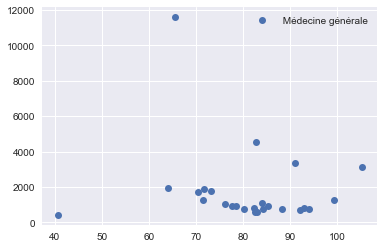

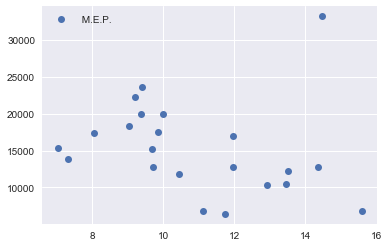

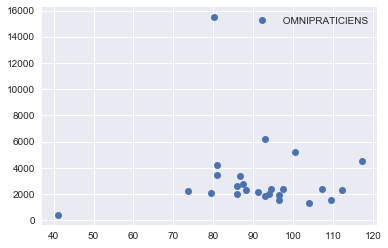

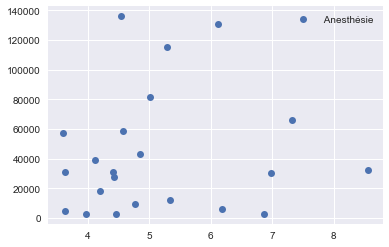

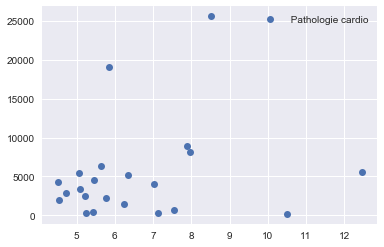

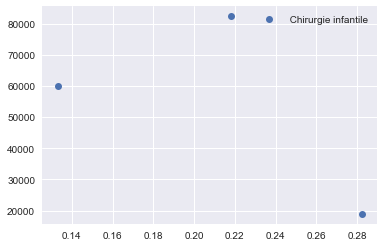

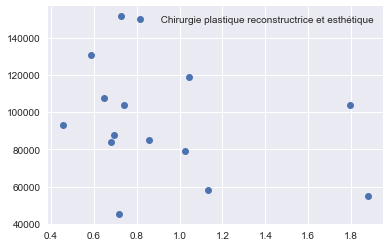

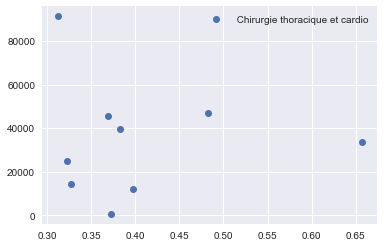

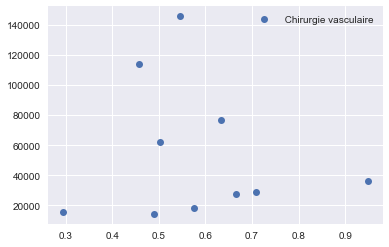

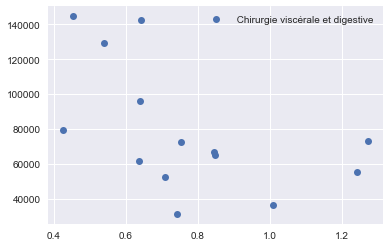

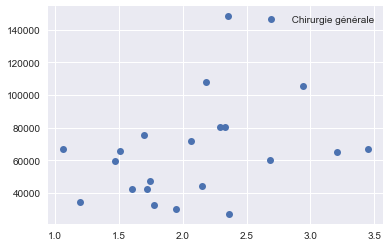

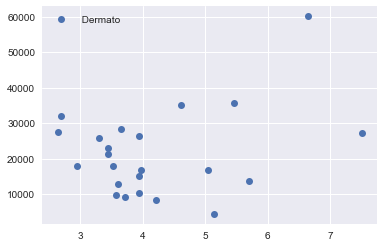

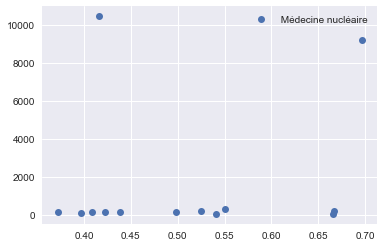

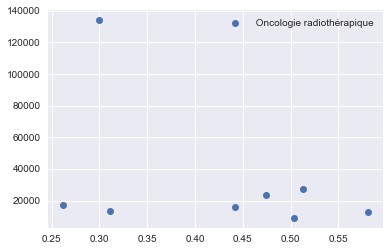

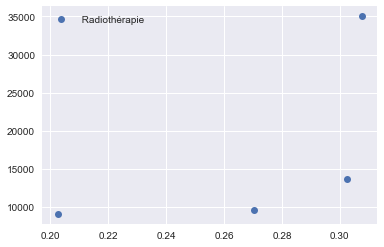

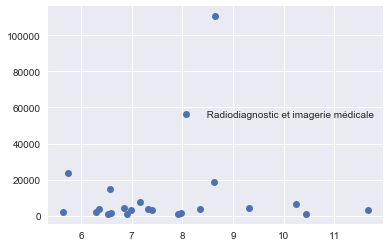

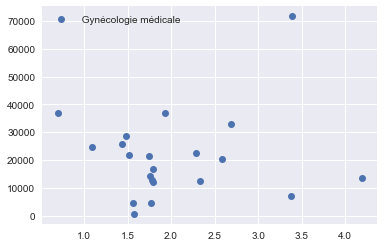

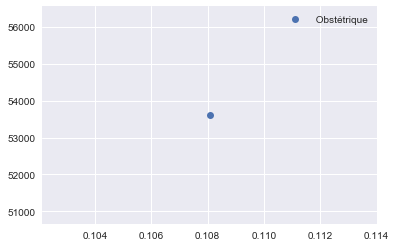

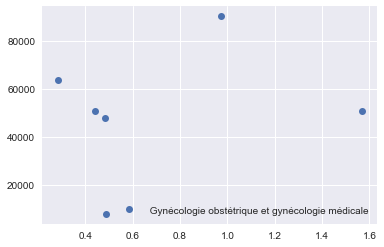

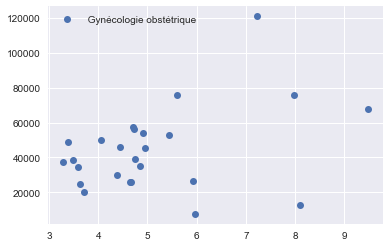

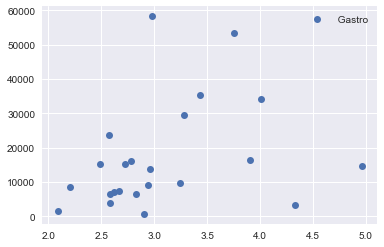

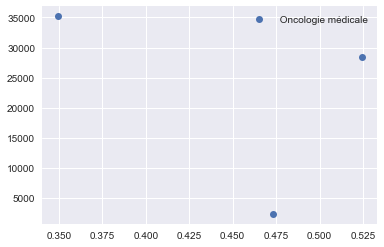

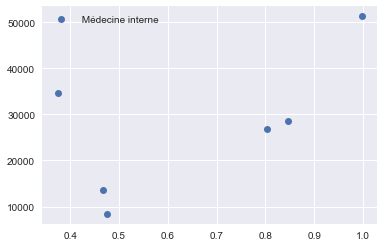

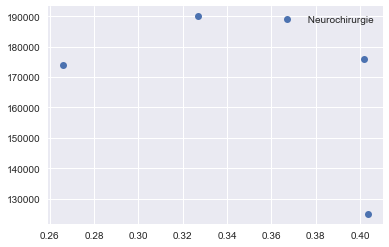

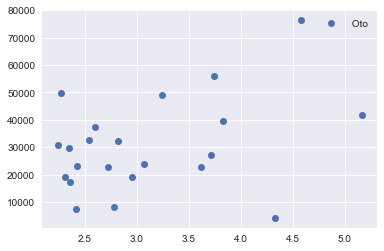

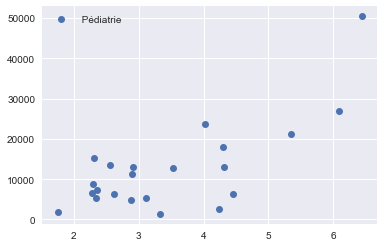

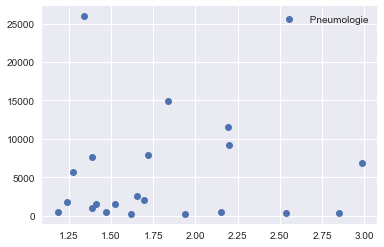

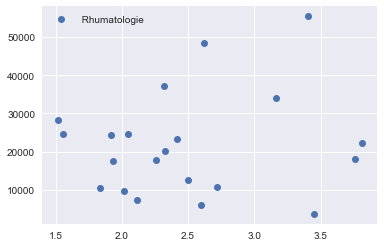

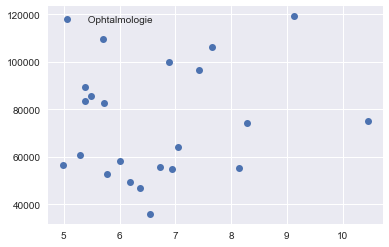

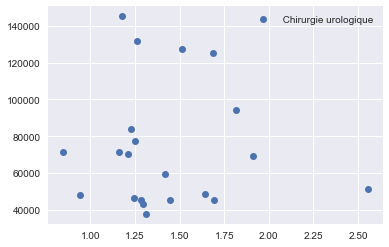

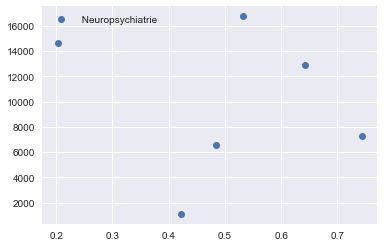

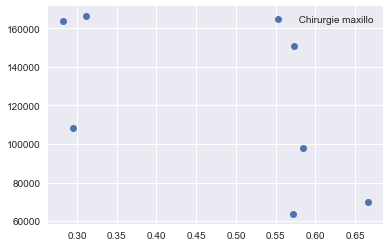

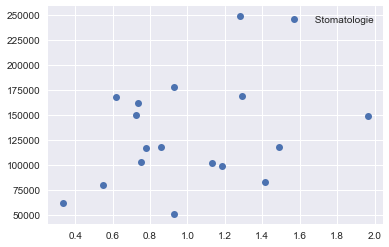

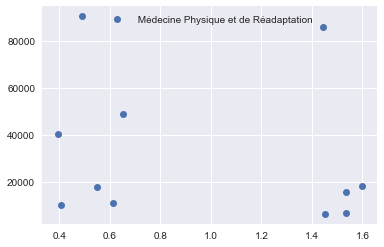

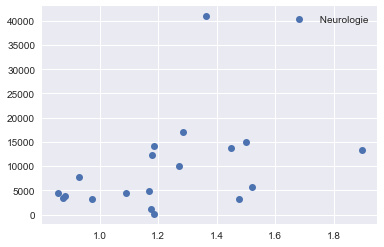

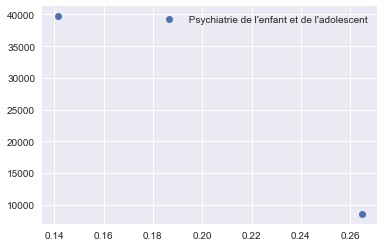

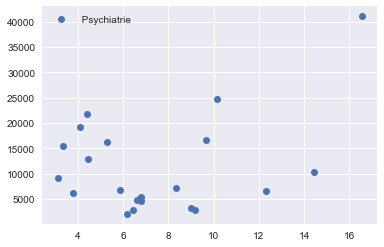

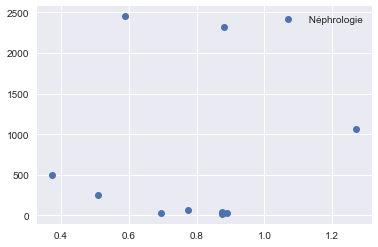

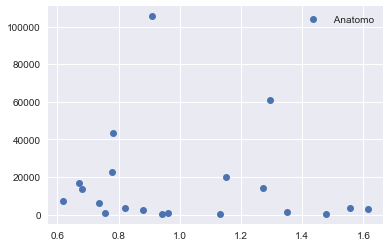

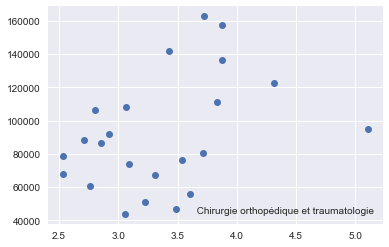

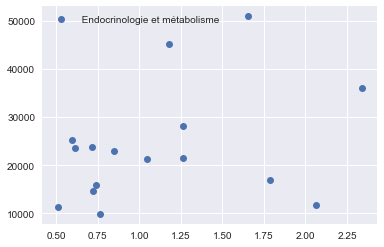

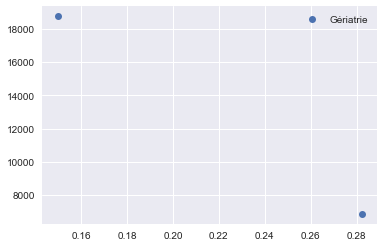

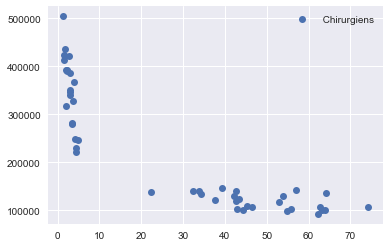

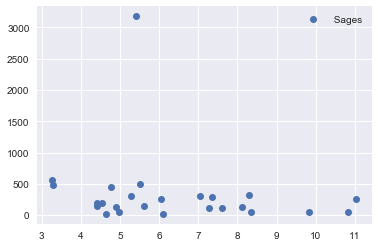

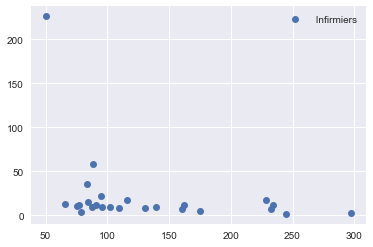

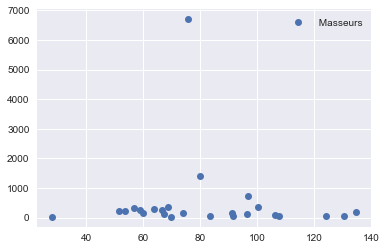

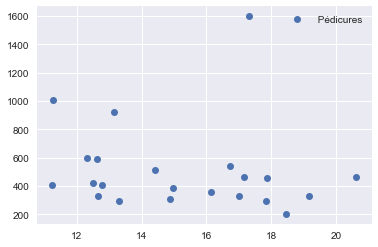

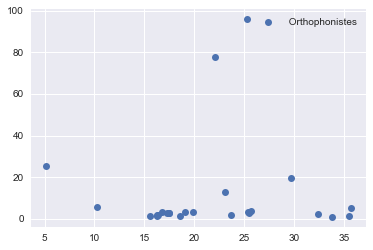

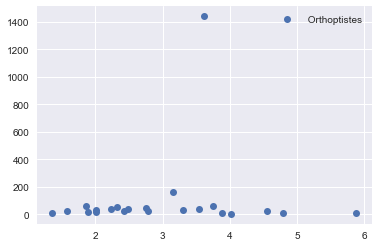

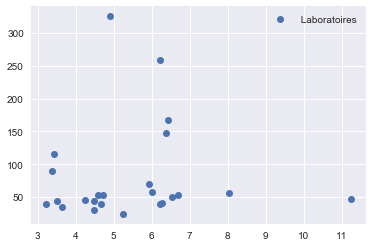

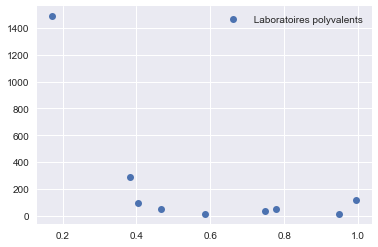

In [17]:
for spe in df_merge['NOM_SPE'].unique():
    df_merge_plot = df_merge[df_merge['NOM_SPE']==spe]
    plt.plot(df_merge_plot['DENSITE'].values.tolist(),df_merge_plot['DEPASSEMENT_MOYEN_ANNUEL'].values.tolist(),'o')
    plt.legend([spe])
    plt.show()

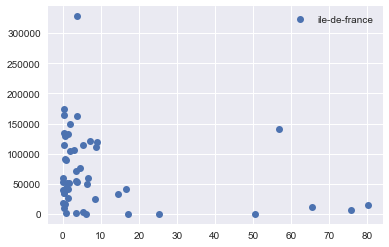

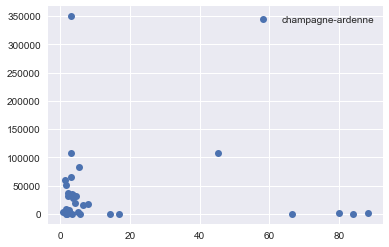

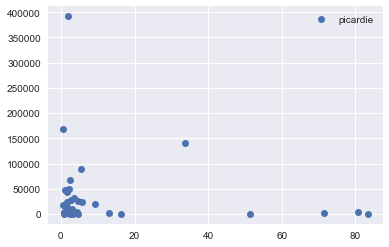

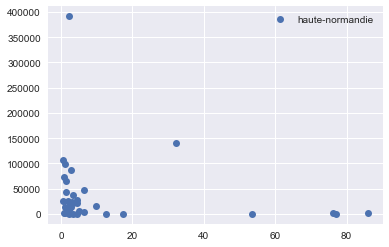

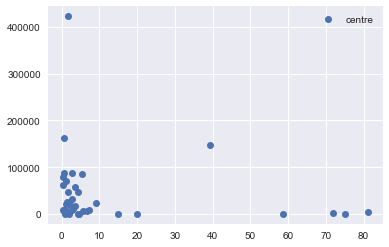

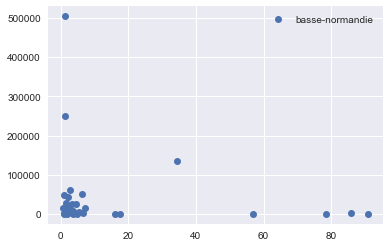

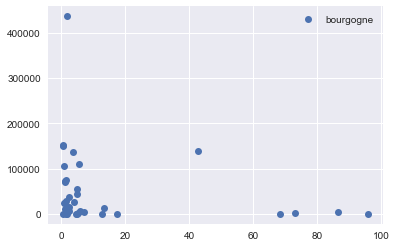

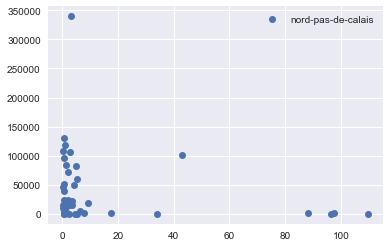

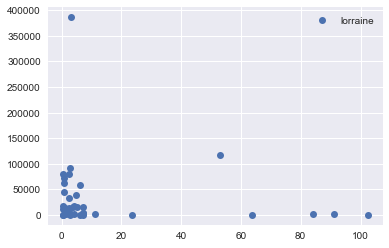

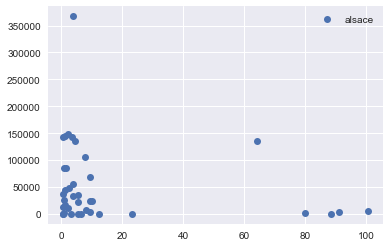

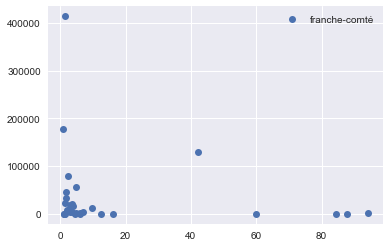

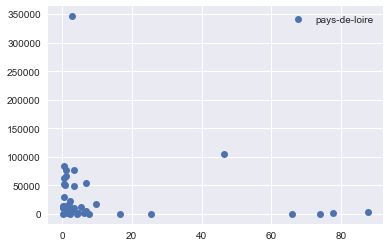

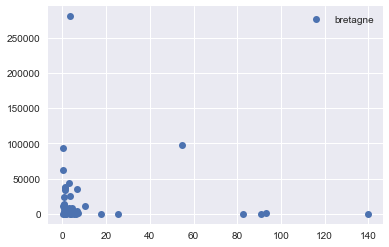

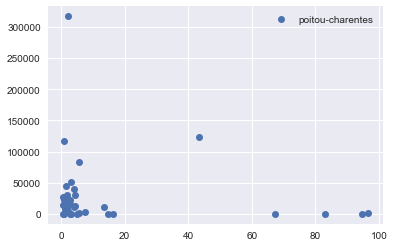

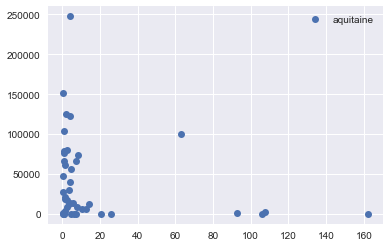

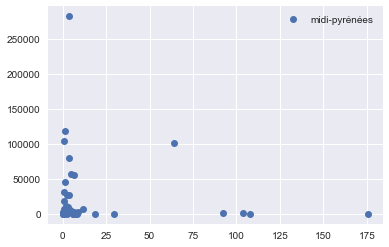

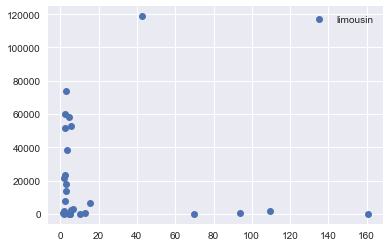

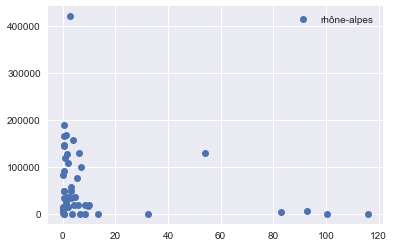

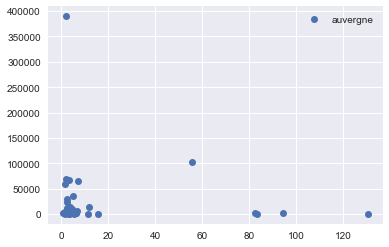

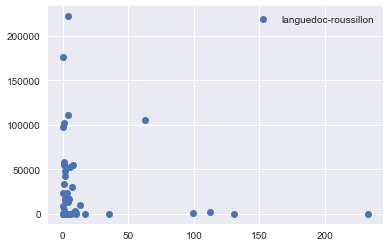

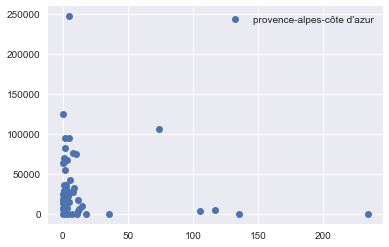

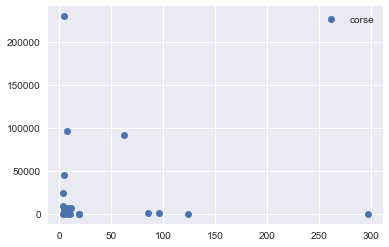

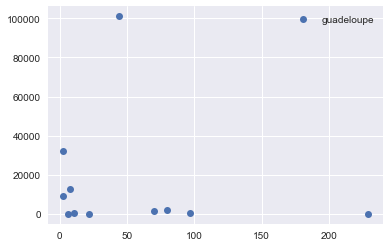

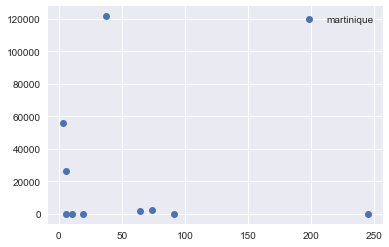

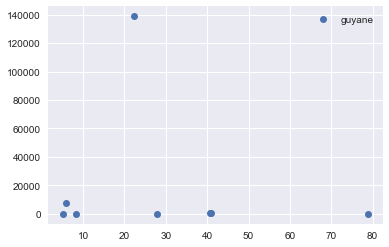

In [18]:
#analyse depassement = f(densite)
for region in df_merge['NOM_REGION'].unique():
    df_merge_plot = df_merge[df_merge['NOM_REGION']==region]
    plt.plot(df_merge_plot['DENSITE'].values.tolist(),df_merge_plot['DEPASSEMENT_MOYEN_ANNUEL'].values.tolist(),'o')
    plt.legend([region])
    plt.show()

On constate que la densité joue un role non négligeable pour expliquer le dépassement d'honoraires moyen, de manière générale les plus grands dépassements se trouvent vers les faibles densités de medecins, on le retrouve notammant sur les plots en fonction de la région (toutes spécialités).

La region joue également un role non négligeable pour expliquer le dépassement d'honoraire moyen, l'échelle du dépassement d'honoraire est différente d'une region à l'autre.

Enfin d'une spécialité à l'autre l'échelle des depassements est totalement différente comme on le voit sur la première série de graphique.

C'est une combinaison de la densité, de la spécialité, et de la région qui explique le dépassement d'honoraires moyens. Attention la région ne constitue pas une explication en soi, il est nécessaire de la lier à d'autres données comme le revenue par habitant.
